# From Biological to Artificial Neurons

artificial neural networks (ANNs) 인공 신경 네트워크
- 복잡하고 큰 기계학습 과제를 해결하기 좋음 

## Logical Computations with Neurons

* ANN 논리연산

    C = A <br>
    C = A and B <br>
    C = A or B <br>
    C = A and not B <br>

In [14]:
# setup 

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

## Perceptron

* The Perceptron

    관련선이 높은 뉴런끼리의 연결에 가중치를 두고 그렇지 못한 곳엔 연결이 약해진다. 
    퍼셉트론은 한 번에 하나의 훈련 인스턴스에 공급되며, 각 인스턴스에 대해 예측을 수행한다. 
    잘못된 연결에 대해서는 보강을 하고 정확한 예측에 대해서는 더욱 가중치를 부여한다.
<p>
* Perceptron learning rule (weight update) <br>
[ W(i,j):next-step = W(i,j) + n(Yj'-Yj)Xi ]
    1. W(i,y) 은 i 번째 input neuron 과 j 번째 output nernon 사이의 weight 값과 연결됨
    2. Xi 는 i 번째 input value 의 현재 학습 인스턴스이다. 
    3. Yj' 은 현재 학습중인 인스턴스의 j 번째 output neuron (예측값)
    4. Yj 는 현재 학습중인 인스턴스의 j 번째 output neuron 의 target output (실제값)
    5. n 은 learning rate

복잡한 패턴에는 맞지 않다. <br>
트레이닝 인스턴스가 선형이라면 Perceptron 이 가능하다.

In [15]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
x = iris.data[:, (2,3)] 
y = (iris.target == 0).astype(np.int) 

per_clf = Perceptron(random_state=42)
per_clf.fit(x,y)
y_pred = per_clf.predict([[2, 0.5]])

In [16]:
y_pred

array([1])

Perceptron class 는 SGDClassifier 사용과 동일하다.  <br>
: loss="perceptron", learning_rate="constant", eta0=1 (the learning rate), and penalty=None (no regularization).

로지스틱 회귀 분류기와 달리, 퍼셉트론은 클래스 확률을 출력하지 않습니다. 
오히려 하드 임계 값을 기반으로 예측을합니다. 

ANN is called a Multi-Layer Perceptron (MLP). <br>
멀티레벨로 xOR 문제를 해결

Saving figure perceptron_iris_plot


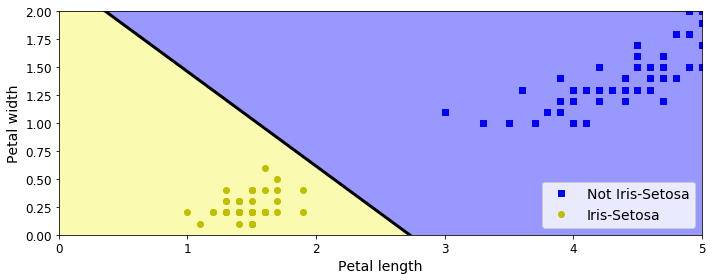

In [18]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(x[y==0, 0], x[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(x[y==1, 0], x[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap, linewidth=5)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

## Multi-Layer Perceptron and Backpropagation


# Training an MLP with TensorFlow’s High-Level API